<a href="https://colab.research.google.com/github/asfarahmad12/Pytorch-Learning/blob/main/Lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 : Preprocessing



In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download necessary datasets
nltk.download('punkt')        # For tokenization
nltk.download('stopwords')    # Stopword list
nltk.download('wordnet')      # WordNet for lemmatization
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
def preprocess_text(text):
  text = text.lower()
  text = text.translate(str.maketrans('', '', string.punctuation))   #Removing Punctuation and Special Characters
  tokens = word_tokenize(text)  #tokenization
  stop_words = set(stopwords.words('english'))  #Stopword Removal
  filtered_tokens = [word for word in tokens if word not in stop_words]
  lemmatizer = WordNetLemmatizer() #Lemmatization
  lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
  preprocessed_text = " ".join(lemmatized_tokens)  ## Return processed text as a string
  return preprocessed_text

In [12]:
# Example text
sample_text = "The quick brown fox jumps over the lazy dog! Running fast isn't always a good strategy."

# Apply preprocessing
cleaned_text = preprocess_text(sample_text)

print("Original Text:", sample_text)
print("Processed Text:", cleaned_text)


Original Text: The quick brown fox jumps over the lazy dog! Running fast isn't always a good strategy.
Processed Text: quick brown fox jump lazy dog running fast isnt always good strategy


#Section 2 : Transforming Text into Numbers

**2.1 One-Hot Encoding**

In [16]:
from nltk.corpus import words
import numpy as np

In [39]:
nltk.download("words")  # Download word list
vocabulary = words.words()  # Get a list of English words

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [15]:
#  Create a Mapping of Words to Indices
word_to_index = {word: idx for idx, word in enumerate(vocabulary)}

In [17]:
def one_hot_encode(word, vocab_size=len(vocabulary)):
  one_hot_vector = np.zeros(vocab_size)

    # Get the index of the word and set it to 1
  if word in word_to_index:
        index = word_to_index[word]
        one_hot_vector[index] = 1
  else:
        print(f"Warning: '{word}' not found in vocabulary!")

  return one_hot_vector

In [37]:
test_word = "apple"
encoded_vector = one_hot_encode(test_word)

# Display Result
print(f"One-Hot Encoding for '{test_word}':\n", encoded_vector)

One-Hot Encoding for 'apple':
 [0. 0. 0. ... 0. 0. 0.]


**2.2 Use sklearn.preprocessing.OneHotEncoder to validate your implementation.**

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
#Convert Vocabulary into a 2D List (Required by OneHotEncoder)
vocab_reshaped = np.array(vocabulary).reshape(-1, 1)

In [24]:
#initialize and Fit OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")  # Avoids errors on unknown words
encoder.fit(vocab_reshaped)  # Learn the vocabulary
#sparse=False → Returns dense NumPy arrays instead of sparse matrices.

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [25]:
def one_hot_encode_sklearn(word):
    word_array = np.array([[word]])  # Convert word to 2D array
    encoded_vector = encoder.transform(word_array)  # Transform word to one-hot encoding
    return encoded_vector


In [26]:
test_word = "apple"
encoded_vector_sklearn = one_hot_encode_sklearn(test_word)

# Display Results
print(f"One-Hot Encoding using Scikit-Learn for '{test_word}':\n", encoded_vector_sklearn)

One-Hot Encoding using Scikit-Learn for 'apple':
 [[0. 0. 0. ... 0. 0. 0.]]


**2.2 Bag of Words (BoW)**

**Task 3.1: Implement Bag of Words manually without using any libraries.**

In [79]:
import nltk
import numpy as np
from collections import Counter

# Download the words corpus if not already available
nltk.download('words')

# Load an existing vocabulary (~5000 words from NLTK)
all_words = set(nltk.corpus.words.words())
vocabulary = list(all_words)

# Create mappings
word_to_index = {word.lower(): i for i, word in enumerate(vocabulary)}
index_to_word = {i: word for word, i in word_to_index.items()}  # Reverse mapping

# Define sample sentences
sentences = [
    "I love football",
    "Football is fun",
    "I love programming",
    "Programming is fun"
]

def bag_of_words(sentence, vocab_mapping):
    words_in_sentence = sentence.lower().split()  # Tokenization (simple split by space)
    word_counts = Counter(words_in_sentence)  # Count word occurrences

    # Ensure vector size matches vocabulary size
    vector_size = len(vocab_mapping)
    vector = np.zeros(vector_size, dtype=int)

    # Populate vector with word counts (handling potential out-of-range indices)
    for word, count in word_counts.items():
        if word in vocab_mapping:
            index = vocab_mapping[word]
            if index < vector_size:  # Prevent out-of-bounds error
                vector[index] = count

    return vector

# Generate BoW vectors and print results
for sentence in sentences:
    bow_vector = bag_of_words(sentence, word_to_index)

    # Print non-zero elements
    non_zero_indices = np.nonzero(bow_vector)[0]
    words_present = [index_to_word[idx] for idx in non_zero_indices]

    print(f"\nSentence: '{sentence}'")
    print(f"Non-Zero Indices: {non_zero_indices}")
    print(f"Words Present: {words_present}")


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!



Sentence: 'I love football'
Non-Zero Indices: [195308 195758 204745]
Words Present: ['love', 'football', 'i']

Sentence: 'Football is fun'
Non-Zero Indices: [ 57034 125573 195758]
Words Present: ['is', 'fun', 'football']

Sentence: 'I love programming'
Non-Zero Indices: [195308 204745]
Words Present: ['love', 'i']

Sentence: 'Programming is fun'
Non-Zero Indices: [ 57034 125573]
Words Present: ['is', 'fun']


**Task 3.2: Use CountVectorizer from sklearn to generate BoW representation and compare results.**

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample sentences
sentences = [
    "I love football",
    "Football is fun",
    "I love programming",
    "Programming is fun"
]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform sentences into BoW representation
bow_matrix = vectorizer.fit_transform(sentences)

# Convert to array format for better visualization
bow_array = bow_matrix.toarray()

# Extract vocabulary (word-to-index mapping)
vocab = vectorizer.get_feature_names_out()

# Print results
print("Vocabulary:", vocab)
print("\nBoW Representation:")
for i, sentence in enumerate(sentences):
    print(f"'{sentence}' → {bow_array[i]}")


Vocabulary: ['football' 'fun' 'is' 'love' 'programming']

BoW Representation:
'I love football' → [1 0 0 1 0]
'Football is fun' → [1 1 1 0 0]
'I love programming' → [0 0 0 1 1]
'Programming is fun' → [0 1 1 0 1]


#2.3 TF-IDF: Smarter Word Weighting

**Task 4.1: Implement TF-IDF manually by calculating Term Frequency (TF) and Inverse Document Frequency (IDF) step by step.**

In [81]:
import numpy as np
import math

# Sample dataset (each string is a document)
documents = [
    "I love football",
    "Football is fun",
    "I love programming",
    "Programming is fun"
]

# Step 1: Tokenize and Build Vocabulary
vocab = set()  # To store unique words
tokenized_docs = []

for doc in documents:
    words = doc.lower().split()  # Tokenization (simple split by space)
    tokenized_docs.append(words)
    vocab.update(words)

vocab = sorted(vocab)  # Sort for consistent ordering
word_to_index = {word: i for i, word in enumerate(vocab)}

# Step 2: Compute Term Frequency (TF)
tf_matrix = np.zeros((len(documents), len(vocab)))

for doc_index, words in enumerate(tokenized_docs):
    word_counts = {}
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1

    total_words = len(words)
    for word, count in word_counts.items():
        tf_matrix[doc_index][word_to_index[word]] = count / total_words  # TF formula

# Step 3: Compute Inverse Document Frequency (IDF)
idf_vector = np.zeros(len(vocab))
total_docs = len(documents)

for i, word in enumerate(vocab):
    doc_count = sum(1 for doc in tokenized_docs if word in doc)  # Count docs containing word
    idf_vector[i] = math.log(total_docs / (1 + doc_count))  # Adding 1 to avoid division by zero

# Step 4: Compute TF-IDF
tfidf_matrix = tf_matrix * idf_vector  # Element-wise multiplication

# Print Results
print("Vocabulary:", vocab)
print("\nTF-IDF Representation:")
for i, doc in enumerate(documents):
    print(f"'{doc}' → {tfidf_matrix[i]}")


Vocabulary: ['football', 'fun', 'i', 'is', 'love', 'programming']

TF-IDF Representation:
'I love football' → [0.09589402 0.         0.09589402 0.         0.09589402 0.        ]
'Football is fun' → [0.09589402 0.09589402 0.         0.09589402 0.         0.        ]
'I love programming' → [0.         0.         0.09589402 0.         0.09589402 0.09589402]
'Programming is fun' → [0.         0.09589402 0.         0.09589402 0.         0.09589402]


**Task 4.2: Use TfidfVectorizer from sklearn to generate TF-IDF representations and compare results.**

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample dataset (each string is a document)
documents = [
    "I love football",
    "Football is fun",
    "I love programming",
    "Programming is fun"
]

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Convert to array for better visualization
tfidf_array = tfidf_matrix.toarray()

# Extract vocabulary (word-to-index mapping)
vocab = vectorizer.get_feature_names_out()

# Print results
print("Vocabulary:", vocab)
print("\nTF-IDF Representation:")
for i, doc in enumerate(documents):
    print(f"'{doc}' → {tfidf_array[i]}")


Vocabulary: ['football' 'fun' 'is' 'love' 'programming']

TF-IDF Representation:
'I love football' → [0.70710678 0.         0.         0.70710678 0.        ]
'Football is fun' → [0.57735027 0.57735027 0.57735027 0.         0.        ]
'I love programming' → [0.         0.         0.         0.70710678 0.70710678]
'Programming is fun' → [0.         0.57735027 0.57735027 0.         0.57735027]


#2.4 Word2Vec: Capturing Meaning in Words

**Task 5: Load and explore pretrained Word2Vec embeddings using gensim to analyze word similarities.**

In [2]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 594.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [3]:
import gensim.downloader as api

# Load a pre-trained Word2Vec model (Google's Word2Vec)
model = api.load("word2vec-google-news-300")  # 300-dimensional embeddings

# Check if the model is loaded
print("Model Loaded Successfully!")


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model Loaded Successfully!


In [4]:
# Find similar words
word = "football"
similar_words = model.most_similar(word, topn=5)

print(f"Words similar to '{word}':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")


Words similar to 'football':
soccer: 0.7314
fooball: 0.7140
Football: 0.7125
basketball: 0.6682
footbal: 0.6649


In [5]:
# Example: King - Man + Woman ≈ Queen
result = model.most_similar(positive=["king", "woman"], negative=["man"], topn=1)
print(f"King - Man + Woman ≈ {result[0][0]}")


King - Man + Woman ≈ queen


In [6]:
similarity = model.similarity("football", "soccer")
print(f"Similarity between 'football' and 'soccer': {similarity:.4f}")


Similarity between 'football' and 'soccer': 0.7314


In [7]:
vector = model["football"]  # Get 300-dimensional vector
print(f"Vector representation of 'football' (first 10 values): {vector[:10]}")


Vector representation of 'football' (first 10 values): [-0.09765625  0.03198242  0.2578125  -0.04150391  0.1015625  -0.10058594
  0.14648438 -0.19921875  0.15332031  0.06347656]


#Section 3: Measuring Text Similarity

**Task 6: Compute cosine similarity for different text representations (BoW, TF-IDF, Word2Vec) and visualize them.**

In [8]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader as api


In [9]:
sentences = [
    "I love football",
    "Football is my favorite sport",
    "I enjoy playing football",
    "Programming is fun"
]


In [10]:
# Convert sentences to BoW vectors
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(sentences)

# Compute cosine similarity
cosine_sim_bow = cosine_similarity(bow_matrix)

print("Cosine Similarity (BoW):\n", cosine_sim_bow)


Cosine Similarity (BoW):
 [[1.         0.31622777 0.40824829 0.        ]
 [0.31622777 1.         0.25819889 0.25819889]
 [0.40824829 0.25819889 1.         0.        ]
 [0.         0.25819889 0.         1.        ]]


In [11]:
# Convert sentences to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Compute cosine similarity
cosine_sim_tfidf = cosine_similarity(tfidf_matrix)

print("Cosine Similarity (TF-IDF):\n", cosine_sim_tfidf)


Cosine Similarity (TF-IDF):
 [[1.         0.17108932 0.22133323 0.        ]
 [0.17108932 1.         0.1308152  0.19126015]
 [0.22133323 0.1308152  1.         0.        ]
 [0.         0.19126015 0.         1.        ]]


In [12]:
# Convert sentences to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Compute cosine similarity
cosine_sim_tfidf = cosine_similarity(tfidf_matrix)

print("Cosine Similarity (TF-IDF):\n", cosine_sim_tfidf)


Cosine Similarity (TF-IDF):
 [[1.         0.17108932 0.22133323 0.        ]
 [0.17108932 1.         0.1308152  0.19126015]
 [0.22133323 0.1308152  1.         0.        ]
 [0.         0.19126015 0.         1.        ]]


In [13]:
# Load pre-trained Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")

# Function to get sentence vectors by averaging word vectors
def get_sentence_vector(sentence, model):
    words = sentence.lower().split()
    word_vectors = [model[word] for word in words if word in model]

    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(300)  # Return zero vector if no words are found

# Convert sentences to Word2Vec vectors
w2v_vectors = np.array([get_sentence_vector(sent, word2vec_model) for sent in sentences])

# Compute cosine similarity
cosine_sim_w2v = cosine_similarity(w2v_vectors)

print("Cosine Similarity (Word2Vec):\n", cosine_sim_w2v)


Cosine Similarity (Word2Vec):
 [[0.99999994 0.6850201  0.8108489  0.35741487]
 [0.6850201  0.99999994 0.67926776 0.4949908 ]
 [0.8108489  0.67926776 1.         0.44850537]
 [0.35741487 0.4949908  0.44850537 0.99999994]]


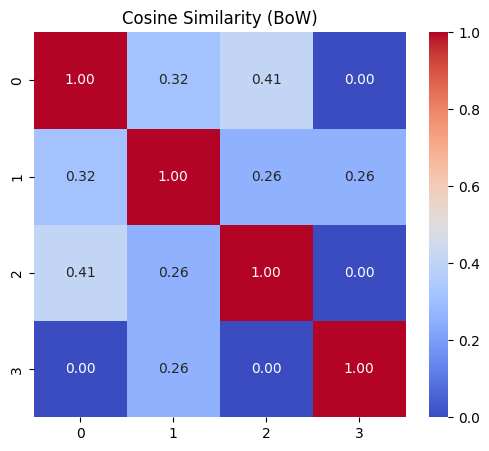

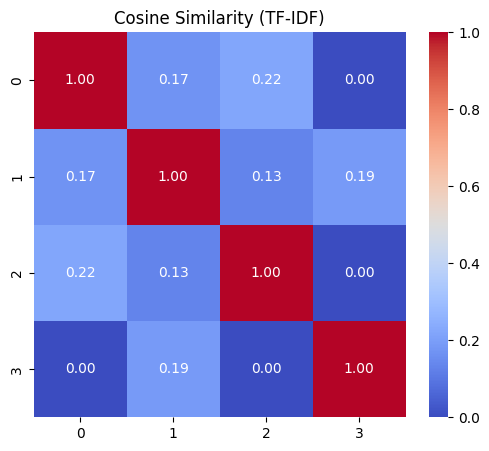

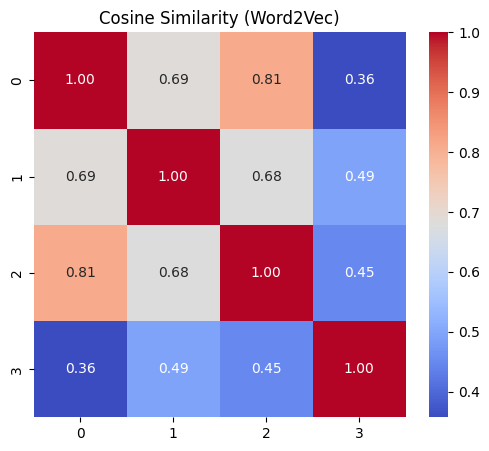

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot heatmaps
def plot_heatmap(sim_matrix, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(sim_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(title)
    plt.show()

# Plot similarity matrices
plot_heatmap(cosine_sim_bow, "Cosine Similarity (BoW)")
plot_heatmap(cosine_sim_tfidf, "Cosine Similarity (TF-IDF)")
plot_heatmap(cosine_sim_w2v, "Cosine Similarity (Word2Vec)")


**1. What are the strengths and weaknesses of One-Hot Encoding, BoW, TF-IDF, and Word2Vec?**

One-Hot Encoding is simple but results in sparse and high-dimensional vectors without capturing word relationships. BoW is easy to implement and effective for simple tasks but ignores word order and semantics. TF-IDF improves upon BoW by weighting words based on importance but still lacks contextual meaning. Word2Vec captures word relationships and meaning in dense vectors, making it powerful for NLP tasks, but requires large datasets and computational power for training.

**2. How does cosine similarity help in text analysis?**

Cosine similarity measures the angle between two text vectors, allowing comparison of document similarity regardless of their length. It is widely used in NLP applications such as search engines, recommendation systems, and document clustering because it effectively captures textual similarity in vector space representations like BoW, TF-IDF, and Word2Vec.

**3. What differences did you observe between manually implemented methods and sklearn's implementations?**

Manually implemented methods provide better conceptual understanding and allow customization but are slower and prone to implementation errors. In contrast, sklearn’s implementations are optimized for performance, handle preprocessing efficiently, and include additional features like stopword removal and normalization, making them more suitable for large-scale NLP tasks.